In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv', parse_dates=['time'])
test = pd.read_csv('test.csv', parse_dates=['time'])
train

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,consumption
0,2021-09-01 00:00:00+03:00,11.2,10.3,94.0,NaN,NaN,320.0,7.2,16.7,1012.6,2.0,0.09016,0.577
1,2021-09-01 01:00:00+03:00,10.7,9.6,93.0,NaN,NaN,320.0,7.2,13.0,1012.6,2.0,0.09251,0.594
2,2021-09-01 02:00:00+03:00,9.9,9.0,94.0,NaN,NaN,320.0,7.2,13.0,1012.2,2.0,0.08890,0.685
3,2021-09-01 03:00:00+03:00,10.0,8.4,90.0,NaN,NaN,330.0,7.2,13.0,1011.9,1.0,0.08735,1.016
4,2021-09-01 04:00:00+03:00,9.0,8.1,94.0,NaN,NaN,300.0,3.6,13.0,1011.4,2.0,0.08688,0.677
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,2022-08-24 19:00:00+03:00,27.1,17.0,54.0,0.0,NaN,180.0,4.0,11.1,1020.0,2.0,0.53494,0.678
8588,2022-08-24 20:00:00+03:00,25.1,17.1,61.0,0.0,NaN,220.0,6.0,11.1,1021.0,1.0,0.49990,0.457
8589,2022-08-24 21:00:00+03:00,24.9,18.1,66.0,0.0,NaN,150.0,4.0,9.3,1020.9,4.0,0.43149,0.500
8590,2022-08-24 22:00:00+03:00,22.1,17.0,73.0,0.0,NaN,160.0,6.0,9.3,1021.0,2.0,0.55203,2.321


In [3]:
test

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price
0,2022-08-25 00:00:00+03:00,21.1,15.2,69.0,0.0,NaN,340.0,9.0,9.3,1022.0,2.0,0.25533
1,2022-08-25 01:00:00+03:00,20.1,15.1,73.0,0.0,NaN,30.0,6.0,14.8,1022.0,2.0,0.19492
2,2022-08-25 02:00:00+03:00,20.1,15.1,73.0,0.0,NaN,320.0,7.0,13.0,1022.0,2.0,0.18853
3,2022-08-25 03:00:00+03:00,18.7,17.0,90.0,0.0,NaN,0.0,4.0,11.1,1022.4,4.0,0.19947
4,2022-08-25 04:00:00+03:00,18.1,17.1,94.0,0.0,NaN,280.0,7.0,11.1,1022.0,3.0,0.21192
...,...,...,...,...,...,...,...,...,...,...,...,...
163,2022-08-31 19:00:00+03:00,11.1,6.0,71.0,0.0,NaN,320.0,19.0,29.6,1016.0,3.0,0.34272
164,2022-08-31 20:00:00+03:00,11.1,5.2,67.0,0.0,NaN,310.0,15.0,24.1,1016.0,3.0,0.33432
165,2022-08-31 21:00:00+03:00,10.1,6.3,77.0,0.0,NaN,290.0,11.0,22.2,1016.9,4.0,0.27233
166,2022-08-31 22:00:00+03:00,9.1,5.1,76.0,0.0,NaN,310.0,15.0,18.5,1016.0,3.0,0.28485


In [4]:
for col in test.columns:
    print(col, test[col].isna().sum())

time 0
temp 0
dwpt 0
rhum 0
prcp 0
snow 168
wdir 0
wspd 0
wpgt 0
pres 0
coco 0
el_price 0


In [5]:
train = train.drop('snow', axis=1) #all of the values according to Kaggle are NaN, therefore we need to drop that column
test = test.drop('snow', axis=1)
train = train.drop('prcp', axis=1) #values are NaN or 0, therefore we need to drop that column
test = test.drop('prcp', axis=1)
train

,time,temp,dwpt,rhum,wdir,wspd,wpgt,pres,coco,el_price,consumption
0,2021-09-01 00:00:00+03:00,11.2,10.3,94.0,320.0,7.2,16.7,1012.6,2.0,0.09016,0.577
1,2021-09-01 01:00:00+03:00,10.7,9.6,93.0,320.0,7.2,13.0,1012.6,2.0,0.09251,0.594
2,2021-09-01 02:00:00+03:00,9.9,9.0,94.0,320.0,7.2,13.0,1012.2,2.0,0.08890,0.685
3,2021-09-01 03:00:00+03:00,10.0,8.4,90.0,330.0,7.2,13.0,1011.9,1.0,0.08735,1.016
4,2021-09-01 04:00:00+03:00,9.0,8.1,94.0,300.0,3.6,13.0,1011.4,2.0,0.08688,0.677
...,...,...,...,...,...,...,...,...,...,...,...
8587,2022-08-24 19:00:00+03:00,27.1,17.0,54.0,180.0,4.0,11.1,1020.0,2.0,0.53494,0.678
8588,2022-08-24 20:00:00+03:00,25.1,17.1,61.0,220.0,6.0,11.1,1021.0,1.0,0.49990,0.457
8589,2022-08-24 21:00:00+03:00,24.9,18.1,66.0,150.0,4.0,9.3,1020.9,4.0,0.43149,0.500
8590,2022-08-24 22:00:00+03:00,22.1,17.0,73.0,160.0,6.0,9.3,1021.0,2.0,0.55203,2.321


In [6]:
for col in train.columns:
    print(col, train[col].isna().sum())

time 0
temp 0
dwpt 0
rhum 0
wdir 0
wspd 0
wpgt 0
pres 0
coco 196
el_price 0
consumption 2


In [7]:
train['coco'].value_counts()

1.0     1815
2.0     1716
4.0     1467
3.0     1120
14.0     767
7.0      623
5.0      232
17.0     179
18.0     113
21.0     104
8.0       94
12.0      48
15.0      38
10.0      18
9.0       17
25.0      15
19.0      13
22.0      10
13.0       2
6.0        2
16.0       1
20.0       1
23.0       1
Name: coco, dtype: int64

In [8]:
train['coco'] = train['coco'].interpolate(method='nearest') #used interpolation since we deal with time series
train

,time,temp,dwpt,rhum,wdir,wspd,wpgt,pres,coco,el_price,consumption
0,2021-09-01 00:00:00+03:00,11.2,10.3,94.0,320.0,7.2,16.7,1012.6,2.0,0.09016,0.577
1,2021-09-01 01:00:00+03:00,10.7,9.6,93.0,320.0,7.2,13.0,1012.6,2.0,0.09251,0.594
2,2021-09-01 02:00:00+03:00,9.9,9.0,94.0,320.0,7.2,13.0,1012.2,2.0,0.08890,0.685
3,2021-09-01 03:00:00+03:00,10.0,8.4,90.0,330.0,7.2,13.0,1011.9,1.0,0.08735,1.016
4,2021-09-01 04:00:00+03:00,9.0,8.1,94.0,300.0,3.6,13.0,1011.4,2.0,0.08688,0.677
...,...,...,...,...,...,...,...,...,...,...,...
8587,2022-08-24 19:00:00+03:00,27.1,17.0,54.0,180.0,4.0,11.1,1020.0,2.0,0.53494,0.678
8588,2022-08-24 20:00:00+03:00,25.1,17.1,61.0,220.0,6.0,11.1,1021.0,1.0,0.49990,0.457
8589,2022-08-24 21:00:00+03:00,24.9,18.1,66.0,150.0,4.0,9.3,1020.9,4.0,0.43149,0.500
8590,2022-08-24 22:00:00+03:00,22.1,17.0,73.0,160.0,6.0,9.3,1021.0,2.0,0.55203,2.321


In [9]:
train = train.dropna()
for col in train.columns:
    print(col, train[col].isna().sum())

time 0
temp 0
dwpt 0
rhum 0
wdir 0
wspd 0
wpgt 0
pres 0
coco 0
el_price 0
consumption 0


In [10]:
def split(X, n_splits, margin=0):
    n_samples = len(X)
    k_fold_size = n_samples // n_splits
    indices = []
    for i in range(n_splits):
        start = i * k_fold_size
        stop = start + k_fold_size
        mid = int(0.75 * (stop - start)) + start
        indices.append((start, mid, mid + margin, stop))
    return indices

blocked_CV = split(train, 15)

In [11]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

train.set_index('time', inplace=True)
test.set_index('time', inplace=True)

df = train.drop('consumption', axis=1)
target = train['consumption']

N = 15
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(train.drop('consumption',1), train.consumption, train_size=0.8) 
split_indices = split(X_train_1, N)


C:\Users\karol\AppData\Local\Temp\ipykernel_6436\1812782012.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(train.drop('consumption',1), train.consumption, train_size=0.8)


In [12]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

alphas = np.linspace(0, 0.2, 21)
models = pd.DataFrame(columns=['model', 'Mean Absolute Error'])

for alpha in alphas:
    model = Ridge(alpha=alpha)
    counter = 0
    for startT,endT,startV,endV in split_indices:
        X_train = df[startT:endT]
        y_train = target[startT:endT]
        X_val = df[startV:endV]
        y_val = target[startV:endV]
        model.fit(X_train, y_train)
        counter += mean_absolute_error(y_val, model.predict(X_val))
    acc = counter / 15
    models = models.append({'model': model, 'Mean Absolute Error': acc}, ignore_index=True)

models=models.sort_values(by=['Mean Absolute Error'])
models

C:\Users\karol\AppData\Local\Temp\ipykernel_6436\4003760067.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append({'model': model, 'Mean Absolute Error': acc}, ignore_index=True)
C:\Users\karol\AppData\Local\Temp\ipykernel_6436\4003760067.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append({'model': model, 'Mean Absolute Error': acc}, ignore_index=True)
C:\Users\karol\AppData\Local\Temp\ipykernel_6436\4003760067.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append({'model': model, 'Mean Absolute Error': acc}, ignore_index=True)
C:\Users\karol\AppData\Local\Temp\ipykernel_6436\4003760067.py:18: FutureWarning: The frame.append method is deprecated and will b

,model,Mean Absolute Error
20,Ridge(alpha=0.2),0.657814
19,Ridge(alpha=0.19),0.657885
18,Ridge(alpha=0.18),0.657959
17,Ridge(alpha=0.17),0.658057
16,Ridge(alpha=0.16),0.658182
15,Ridge(alpha=0.15),0.658314
14,Ridge(alpha=0.14),0.658457
13,Ridge(alpha=0.13),0.658607
12,Ridge(alpha=0.12),0.658766
11,Ridge(alpha=0.11),0.658945


In [13]:
model = Ridge(alpha=0.2)
model.fit(X_train_1, y_train_1)
print(mean_absolute_error(y_test_1, model.predict(X_test_1)))

0.6256071194686286


In [14]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

param = {
    'alpha':[.0001, 0.001,0.01, 0.01,1,5],
    'fit_intercept':[True,False],
    'normalize':[True,False],
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# define search


grid = GridSearchCV(
    estimator=Ridge(),
    param_grid=param,
    cv=TimeSeriesSplit(n_splits=10), scoring='neg_mean_absolute_error', verbose=0, n_jobs=-1
)


X = train.drop('consumption', 1)
y =  train['consumption']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7) 
grid.fit(X_train, y_train)
print(mean_absolute_error(y_test, grid.predict(X_test)))

C:\Users\karol\AppData\Local\Temp\ipykernel_6436\496022347.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train.drop('consumption', 1)


0.6036991704889909


c:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [30]:
print(grid.best_params_)

{'alpha': 5, 'fit_intercept': False, 'normalize': True, 'solver': 'lsqr'}


In [15]:

model = SVR(kernel='linear')
counter = 0
for startT,endT,startV,endV in split_indices:
    X_train = df[startT:endT]
    y_train = target[startT:endT]
    X_val = df[startV:endV]
    y_val = target[startV:endV]
    model.fit(X_train, y_train)
    counter += mean_absolute_error(y_val, model.predict(X_val))
acc = counter / 15
models = models.append({'model': model, 'Mean Absolute Error': acc}, ignore_index=True)

models=models.sort_values(by=['Mean Absolute Error'])
models

C:\Users\karol\AppData\Local\Temp\ipykernel_6436\20359945.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append({'model': model, 'Mean Absolute Error': acc}, ignore_index=True)


,model,Mean Absolute Error
21,SVR(kernel='linear'),0.584587
0,Ridge(alpha=0.2),0.657814
1,Ridge(alpha=0.19),0.657885
2,Ridge(alpha=0.18),0.657959
3,Ridge(alpha=0.17),0.658057
4,Ridge(alpha=0.16),0.658182
5,Ridge(alpha=0.15),0.658314
6,Ridge(alpha=0.14),0.658457
7,Ridge(alpha=0.13),0.658607
8,Ridge(alpha=0.12),0.658766


In [16]:
model = SVR(kernel='linear')
model.fit(X_train_1, y_train_1)
print(mean_absolute_error(y_test_1, model.predict(X_test_1)))

0.610254486662606


In [17]:
param = {'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
grid2 = GridSearchCV(
    estimator=SVR(),
    param_grid=param,
    cv=TimeSeriesSplit(n_splits=10), verbose=0, n_jobs=3
)
grid2.fit(X_train,y_train)
print(grid2.best_params_)
print(mean_absolute_error(y_test, grid2.predict(X_test)))

{'C': 1.5, 'epsilon': 0.1, 'gamma': 1e-07}
0.6734248502086593


In [18]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
print(mean_absolute_error(y_test, regr.predict(X_test)))

0.6407198277632457


In [19]:
parametersGrid = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

grid3 = GridSearchCV(
    estimator=ElasticNet(),
    param_grid=parametersGrid,
    cv=TimeSeriesSplit(n_splits=60), scoring='neg_mean_absolute_error', verbose=0, n_jobs=-1
)

grid3.fit(X_train,y_train)
print(grid3.best_params_)
print(mean_absolute_error(y_test, grid3.predict(X_test)))

{'alpha': 0.1, 'l1_ratio': 0.0, 'max_iter': 1}
0.5899394056763874


c:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.283e+01, tolerance: 1.921e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [20]:
from patsy import dmatrices
from statsmodels.regression import linear_model
import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
expr = 'consumption ~ temp + dwpt + rhum + wdir + wspd + wpgt + pres + coco + el_price'
dataset_len = len(train)
split_index = round(dataset_len*0.9)
train_set_end_date = train.index[split_index]
df_train = train.loc[df.index <= train_set_end_date].copy()
df_test = train.loc[df.index > train_set_end_date].copy()
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')
olsr_results = linear_model.OLS(y_train, X_train).fit()
olsr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     84.36
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          3.63e-150
Time:                        18:22:20   Log-Likelihood:                -11578.
No. Observations:                7732   AIC:                         2.318e+04
Df Residuals:                    7722   BIC:                         2.324e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7662      1.408     -0.544      0.586      -3.526       1.994
temp          -0.0296      0.020     -1.516      0.130      -0.068       0.009
dwpt          -0.0050      0.020     -0.247      0.805      -0.044       0.034
rhum           0.0002      0.005      0.049      0.961      -0.009       0.009
wdir          -0.0004      0.000     -2.622      0.009      -0.001   -9.45e-05
wspd          -0.0110      0.004     -2.458      0.014      -0.020      -0.002
wpgt           0.0096      0.002      4.243      0.000       0.005       0.014
pres           0.0021      0.001      1.698      0.090      -0.000       0.005
coco           0.0160      0.003      5.438      0.000       0.010       0.022
el_price      -1.5770      0.147    -10.694      0.000      -1.866      -1.288
==============================================================================
Omnibus:                     6757.119   Durbin-Watson:                   0.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           210028.447
Skew:                           4.196   Prob(JB):                         0.00
Kurtosis:                      27.114   Cond. No.                     1.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

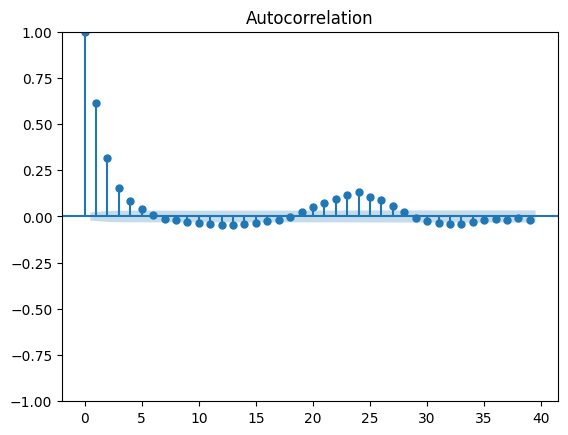

In [21]:
tsa.plot_acf(olsr_results.resid, alpha=0.05)
plt.show()

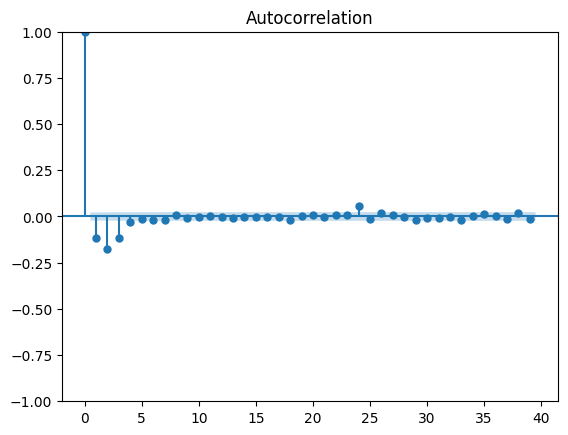

In [22]:
olsr_resid_diff_1 = olsr_results.resid.diff()
olsr_resid_diff_1 = olsr_resid_diff_1.dropna()
tsa.plot_acf(olsr_resid_diff_1, alpha=0.05)
plt.show()

C:\Users\karol\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


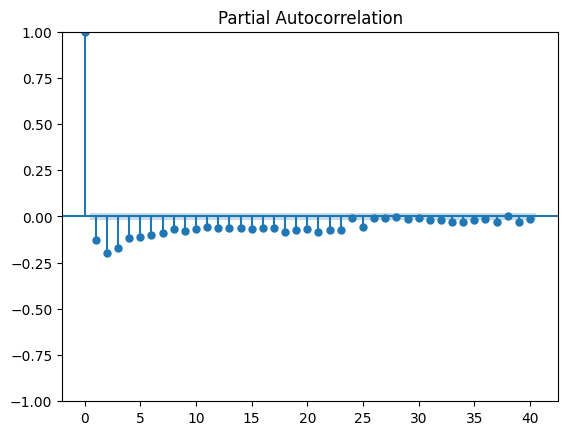

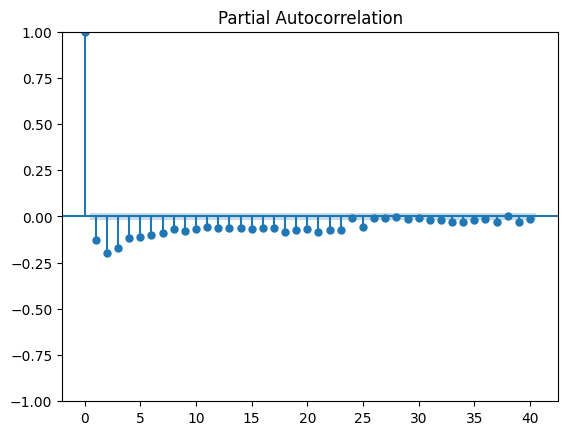

In [23]:
tsa.plot_pacf(train.consumption.diff().dropna())

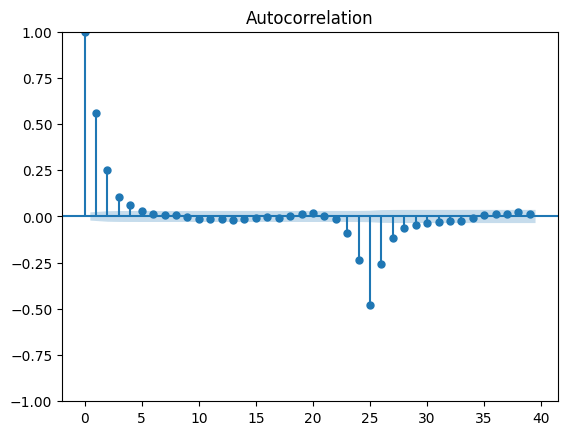

In [24]:
olsr_resid_diff_1_25 = olsr_results.resid.diff(periods=25)
tsa.plot_acf(olsr_resid_diff_1_25.dropna())
plt.show()

In [25]:
from statsmodels.tsa.arima.model import ARIMA as ARIMA
#p = 1
#d = 0, try 1 also
#q =1
sarimax_model = ARIMA(endog=y_train, exog=X_train,order=(1,0,1), seasonal_order=(0,1,1,25))
sarimax_results = sarimax_model.fit()
predictions = sarimax_results.get_forecast(steps=len(X_test), exog=X_test)
print(mean_absolute_error(y_test, predictions.summary_frame()['mean']))

C:\Users\karol\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karol\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karol\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karol\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.7155581646918697


C:\Users\karol\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [31]:
def save(name, model):
    with open(name, 'w', newline='', encoding='utf-8') as f:
        df = pd.DataFrame(model.predict(test))
        df.index = test.index
        df.index.name = "time"
        df.rename(columns={0: 'consumption'})['consumption'].to_csv(f)

X = train.drop('consumption', axis=1)
y = train.consumption
ridge_reg = Ridge(alpha=0.2)
ridge_reg.fit(X, y)
save("RidgeRegression.csv", ridge_reg)

ridge_reg_gs = Ridge(**{'alpha': 5, 'fit_intercept': False, 'normalize': True, 'solver': 'lsqr'})
ridge_reg_gs.fit(X, y)
save("RidgeRegressionGS.csv", ridge_reg_gs)

svr_lin = SVR(kernel='linear')
svr_lin.fit(X,y)
save("SVRLinear.csv", svr_lin)

svr_lin_gs = SVR(kernel='linear', **{'C': 1.5, 'epsilon': 0.1, 'gamma': 1e-07})
svr_lin_gs.fit(X, y)
save("SVRLinearGS.csv", svr_lin_gs)

el_net = ElasticNet(random_state=0)
el_net.fit(X,y)
save("ElasticNet.csv", el_net)

el_net_gs = ElasticNet(random_state=0, **{'alpha': 0.1, 'l1_ratio': 0.0, 'max_iter': 1})
el_net_gs.fit(X,y)
save("ElasticNetGS.csv", el_net_gs)

c:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.746e+03, tolerance:

In [47]:
sarimax_model = ARIMA(endog=y, exog=X,order=(1,0,1), seasonal_order=(0,1,1,25))
sarimax_results = sarimax_model.fit()
predictions = sarimax_results.get_forecast(steps=len(X), exog=X)
with open('ARIMA.csv', 'w', newline='', encoding='utf-8') as f:
        predictions = sarimax_results.get_forecast(steps=len(test), exog=test)
        df = pd.DataFrame(predictions.summary_frame()['mean'])
        df.index = test.index
        df.index.name = "time"
        print(df)
        df.rename(columns={'mean': 'consumption'})['consumption'].to_csv(f)

C:\Users\karol\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karol\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karol\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\karol\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\karol\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\t

                               mean
time                               
2022-08-25 00:00:00+03:00  0.545525
2022-08-25 01:00:00+03:00  0.914471
2022-08-25 02:00:00+03:00  0.801973
2022-08-25 03:00:00+03:00  0.785092
2022-08-25 04:00:00+03:00  0.540236
...                             ...
2022-08-31 19:00:00+03:00  0.852799
2022-08-31 20:00:00+03:00  0.920688
2022-08-31 21:00:00+03:00  1.025876
2022-08-31 22:00:00+03:00  1.090743
2022-08-31 23:00:00+03:00  1.178290

[168 rows x 1 columns]


C:\Users\karol\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


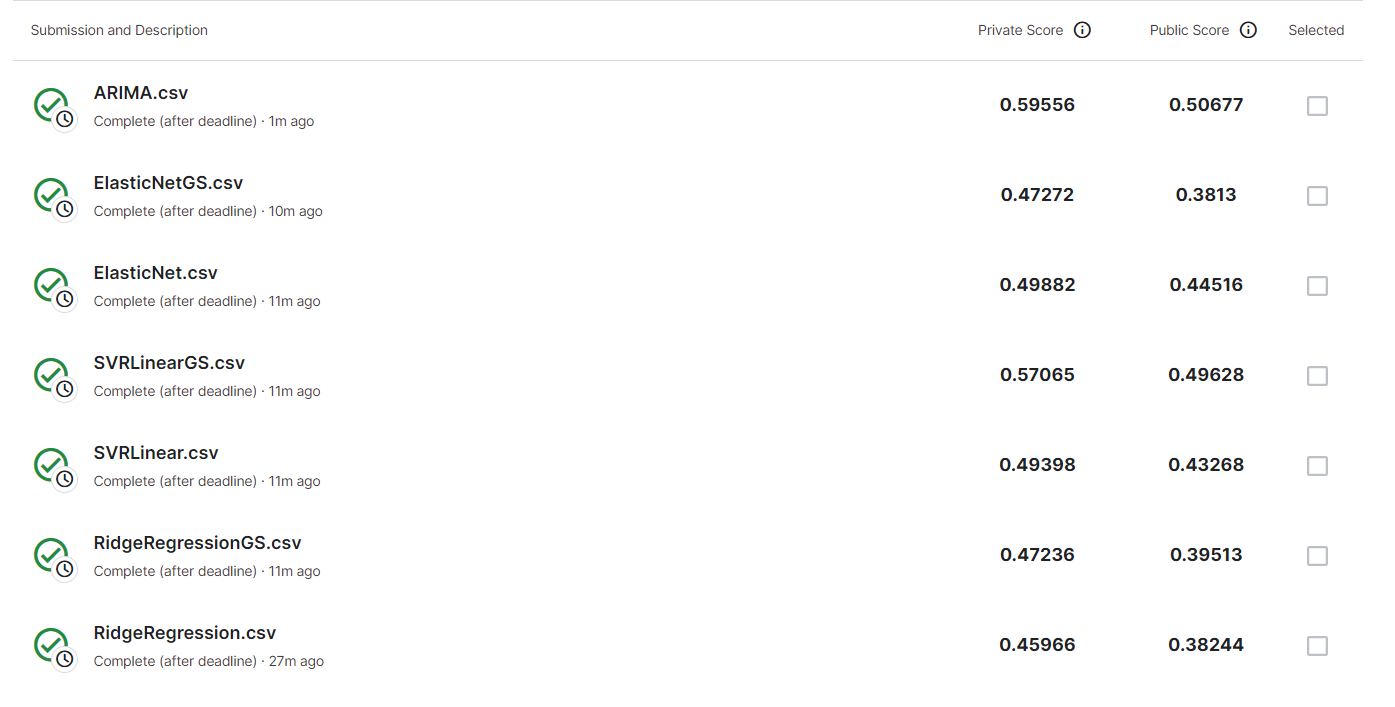

In [49]:
from IPython.display import Image
Image(filename='submissions.png') 